## Introduction


I am trying to predict for how much money each house

In this mainly we will look at data exploration and data cleaning 

we will use LinearRegression to trian our model.


### By the In the project we will answer 3 below questions:

 ###### Q1 : What are the most important  variables to our traget ?
###### Q2 : Is our traget variables normally distributed? if not how can you make it normally ?
###### Q3: Can you improve the accuracy of a model ?

In [60]:
# import important libraries
import numpy as np
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [45]:
df = pd.read_csv('House_data.csv')

In [46]:
df.shape

(2919, 81)

In [47]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

#### checking for missing values missing value

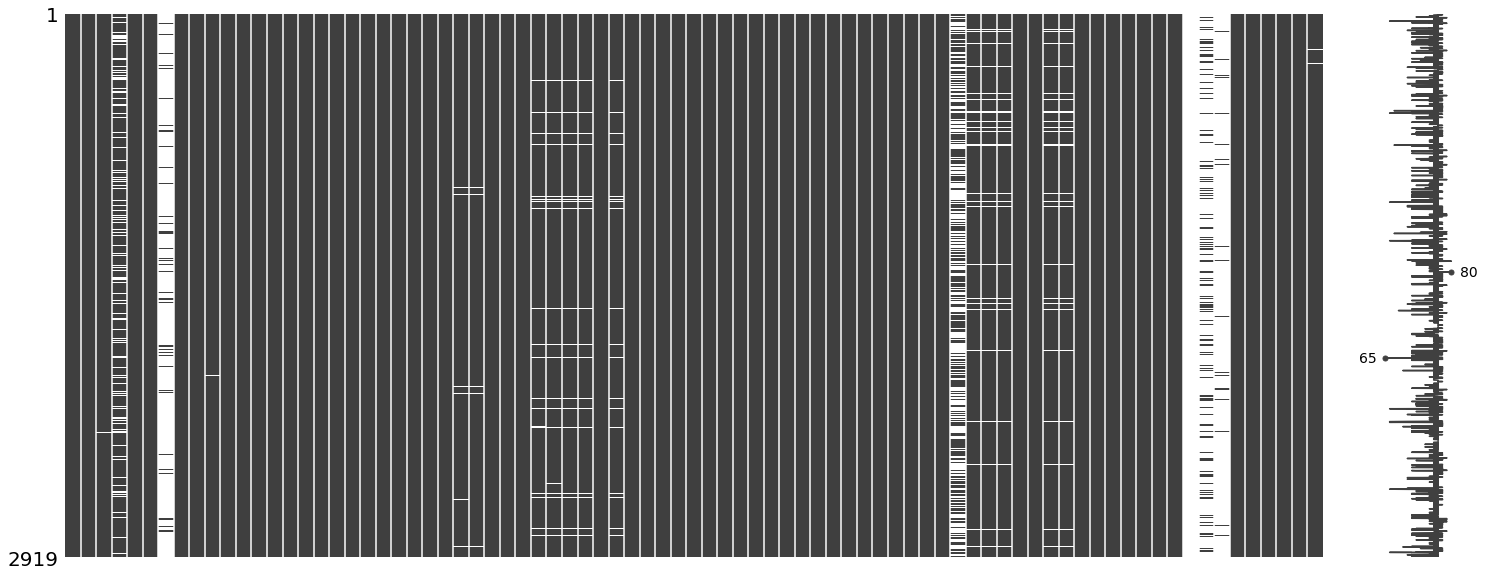

In [48]:
msno.matrix(df);

From above we can tell they are misssing values in our data 

In [9]:
np.sum(np.sum(df.isnull()) != 0)  # there are 35 columns in our data have missing value

35

In [10]:
nan = [(c,df[c].isna().mean()*100) for c in df]
nan = pd.DataFrame(nan, columns=["column", "%"])
pd.set_option('display.max_row', 500)
nan=nan[nan['%'] !=0.00000].sort_values("%", ascending=False)
nan

,column,%
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
57,FireplaceQu,48.646797
3,LotFrontage,16.649538
64,GarageCond,5.447071
59,GarageYrBlt,5.447071
60,GarageFinish,5.447071
63,GarageQual,5.447071


From above we can safely drop first 5 columns since they have more than 50% missing value 

In [117]:
df = df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

In [12]:
df  = df.dropna(subset=['SalePrice'], axis=0) # we will drop the missing value in our response since it is only 1 %

In [49]:
df_object = df.select_dtypes(include=['object'])
#since we dont know much about our data we can replace the the missing value in our categorical variables with mode
for column in df_object.columns:
    df_object[column].fillna(df_object[column].mode()[0], inplace=True);

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [50]:
df_number = df.select_dtypes(include=['int64','float64'])
df_number = df_number.fillna(df_number.mean())
# we will do the same for continuous variables. we will replace nan with the mean 

In [51]:
df_final = pd.concat([df_number,df_object], axis=1)

In [18]:
np.sum(np.sum(df_final.isnull()) != 0)  # we just wnana make sure there is no missing value in our data 

0

In [19]:
df_final.shape

(2914, 76)

In [53]:
df= df_final # renaming our data to df 

### dummy variable all categorical variables

In [69]:

#Pull a list of the column names of the categorical variables
cat_cols_lst = df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [70]:


#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(2919, 247)


## Q1 : What are the most important  variables to our traget ?
to anser this question we need to see  the correlation between the variables

In [97]:
corr =df_new.corr()
corr=corr[['SalePrice']].sort_values('SalePrice', ascending=False)
corr.head(20)

,SalePrice
SalePrice,1.000000
GrLivArea,0.577628
OverallQual,0.562393
GarageCars,0.492416
GarageArea,0.479366
TotRmsAbvGrd,0.467257
FullBath,0.456180
1stFlrSF,0.453764
TotalBsmtSF,0.448506
YearBuilt,0.402485


From above we can see the the most important variables to Sale Price, we will consider any variables have more than 4 % corr have good relationship:

 1-GrLivArea 2-OverallQual 3-GarageCars 4-GarageArea 5-TotRmsAbvGrd 6-FullBath 7-1stFlrSF 
8-TotalBsmtSF 9-YearBuilt 

## Q2 : Is our traget variables normally distributed? if not how can you make it normally ?

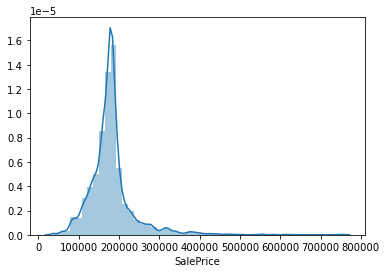

In [71]:
sns.distplot(df_new['SalePrice']);

As we see, the target variable SalePrice is not normally distributed.
This can reduce the performance of the ML regression models because some assume normal distribution,

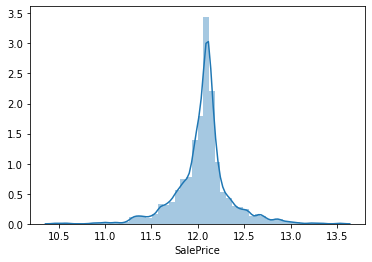

In [72]:
df_new['SalePrice'] = np.log(df_new['SalePrice'])

sns.distplot(df_new['SalePrice']);
#  we will make a log transformation, the resulting distribution looks much better.

### Now we will Try of Predicting SalePrice

In [108]:
X= df_new.drop(['SalePrice','Id'], axis=1)
y=df_new['SalePrice']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
lm_model = LinearRegression() 

lm_model.fit(X_train, y_train) 

LinearRegression()

In [110]:
y_test_preds = lm_model.predict(X_test)# Predictions here
r2_test = r2_score(y_test, y_test_preds) # Rsquared here

# Print r2 to see result
r2_test

0.403451374874072

It looks like our test score is 4 % which is very low . we will try to amprove this later !

## Q3: Can you improve the accuracy of a model ?

we will try Random Forest to fit our model 

In [113]:
 
Rf = RandomForestRegressor(n_estimators = 20,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=20)

In [114]:
y_test_preds_RF = Rf.predict(X_test)# Predictions here
r2_test_RF = r2_score(y_test, y_test_preds_RF) # Rsquared here

# Print r2 to see result
r2_test_RF

0.4753532289822622

it looks like we improve performance for our model by 7%

In [116]:
result = pd.DataFrame({"Actual":y_test,"predictor":y_test_preds})
result.to_excel('result.xlsx') 

End!